In [1]:
import torch
from d2l import torch as d2l

### 多输入通道

In [2]:
def corr2d_multi_in(X, K):
    return sum(d2l.corr2d(x, k) for x, k in zip(X, K))

### 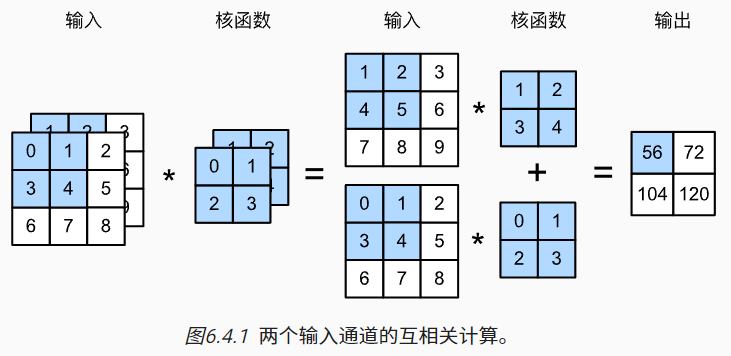

In [3]:
X = torch.tensor([[[0.0, 1.0, 2.0], [3.0, 4.0, 5.0], [6.0, 7.0, 8.0]],
               [[1.0, 2.0, 3.0], [4.0, 5.0, 6.0], [7.0, 8.0, 9.0]]])
K = torch.tensor([[[0.0, 1.0], [2.0, 3.0]], [[1.0, 2.0], [3.0, 4.0]]])

corr2d_multi_in(X, K)

tensor([[ 56.,  72.],
        [104., 120.]])

### 多输出通道

In [4]:
# 多输出  就是多来几个核函数  分别与输入进行卷积
def corr2d_multi_in_out(X, K):
    # 将多个核函数分别于输入进行卷积， 然后竖直堆叠在一起
    return torch.stack([corr2d_multi_in(X, k) for k in K], 0)

In [5]:
print(torch.stack((K, K), 0))
print(torch.stack((K, K + 1), 0))

tensor([[[[0., 1.],
          [2., 3.]],

         [[1., 2.],
          [3., 4.]]],


        [[[0., 1.],
          [2., 3.]],

         [[1., 2.],
          [3., 4.]]]])
tensor([[[[0., 1.],
          [2., 3.]],

         [[1., 2.],
          [3., 4.]]],


        [[[1., 2.],
          [3., 4.]],

         [[2., 3.],
          [4., 5.]]]])


In [6]:
K = torch.stack((K, K + 1, K + 2), 0)
K.shape

torch.Size([3, 2, 2, 2])

In [7]:
corr2d_multi_in_out(X, K)

tensor([[[ 56.,  72.],
         [104., 120.]],

        [[ 76., 100.],
         [148., 172.]],

        [[ 96., 128.],
         [192., 224.]]])

### 1 x 1 卷积层 (相当于全连接层)
# 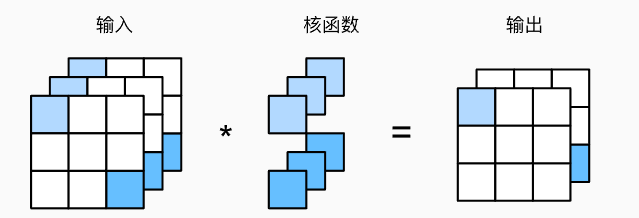

In [9]:
def corr2d_multi_in_out_1x1(X, K):
    c_i, h, w = X.shape
    c_o = K.shape[0]
    # 将二维拉平成行向量  X  (3, 9)
    X = X.reshape((c_i, h * w))
    # K (2, 3)
    K = K.reshape((c_o, c_i))
    Y = torch.matmul(K, X)
    return Y.reshape((c_o, h, w))

In [10]:
X = torch.normal(0, 1, (3, 3, 3))
K = torch.normal(0, 1, (2, 3, 1, 1))

Y1 = corr2d_multi_in_out_1x1(X, K)
Y2 = corr2d_multi_in_out(X, K)
Y1, Y2

(tensor([[[ 2.3303, -4.3565, -1.6191],
          [ 3.0454, -3.4941,  0.6084],
          [-5.0248, -6.9852, -0.3697]],
 
         [[-0.9099, -0.7525,  1.8345],
          [ 0.0945,  1.7975,  0.9461],
          [ 1.1894,  0.0445, -0.6509]]]),
 tensor([[[ 2.3303, -4.3565, -1.6191],
          [ 3.0454, -3.4941,  0.6084],
          [-5.0248, -6.9852, -0.3697]],
 
         [[-0.9099, -0.7525,  1.8345],
          [ 0.0945,  1.7975,  0.9461],
          [ 1.1894,  0.0445, -0.6509]]]))